In [1]:
import hepytorch as hep

myHEP = hep.HEPTorch('./recipes/simple_mass_estimator.json')

/Users/i550012/study/heptopics/hepytorch/hepytorch/preprocessors/energy.py:82: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  return torch.from_numpy(target.values).type(torch.float).reshape(-1, 1)


In [2]:
result = myHEP.train()

Epoch 0, loss: 63.688149086363616
Epoch 1, loss: 0.9964649237226605
Epoch 2, loss: 0.9564045080957271
Epoch 3, loss: 0.9330138981423065
Epoch 4, loss: 0.9169475156529074
Epoch 5, loss: 0.9103938201859446
Epoch 6, loss: 0.9126344527189104
Epoch 7, loss: 0.9046879163131231
Epoch 8, loss: 0.9016054309888714
Epoch 9, loss: 0.8935434016564009
Epoch 10, loss: 0.9035494847969735
Epoch 11, loss: 0.882973166481194
Epoch 12, loss: 0.9079074859146179
Epoch 13, loss: 0.8841075920807178
Epoch 14, loss: 0.8916126610896148
Epoch 15, loss: 0.8930583378811604
Epoch 16, loss: 0.8941007403396928
Epoch 17, loss: 0.8785344757527569
Epoch 18, loss: 0.8910345232328687
Epoch 19, loss: 0.8840060710439789
Epoch 20, loss: 0.8698913290695824
Epoch 21, loss: 0.8762797561701433
Epoch 22, loss: 0.8700414434874199
Epoch 23, loss: 0.8724136642233555
Epoch 24, loss: 0.8928183356359477
Epoch 25, loss: 0.882225132624139
Epoch 26, loss: 0.882098022774107
Epoch 27, loss: 0.8822017655921486
Epoch 28, loss: 0.858515863892001

In [3]:
import matplotlib.pyplot as plt
top_mass = myHEP.model(myHEP.data).detach().numpy()
true_mass = myHEP.target.detach().numpy()
print(top_mass)

[[172.18748]
 [171.8914 ]
 [172.82587]
 ...
 [172.3196 ]
 [172.14153]
 [171.88808]]


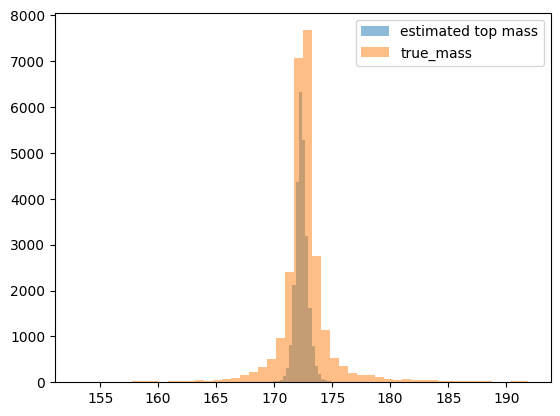

In [4]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label='estimated top mass')
plt.hist(true_mass, bins=50, alpha=0.5, label='true_mass')
plt.legend(loc='upper right')
plt.show()

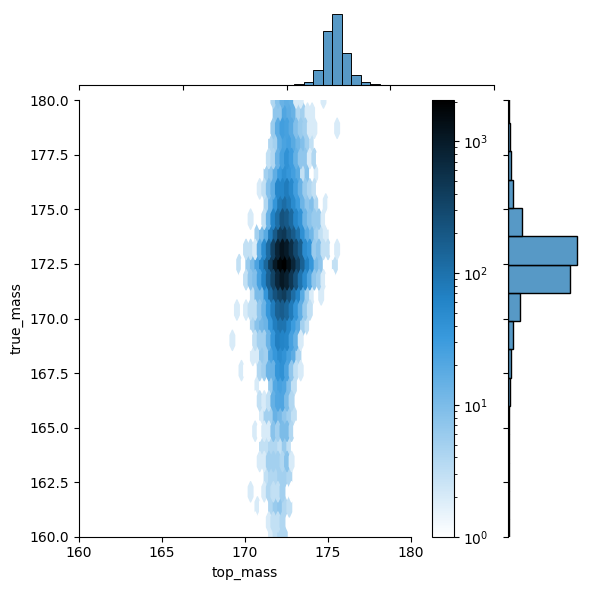

In [8]:
import seaborn as sns
import pandas as pd
from matplotlib.colors import LogNorm, Normalize

# print shape of top_mass and true_mass
# convert top_mass and true_mass into a one-dimensional array
top_mass = top_mass.flatten()
true_mass = true_mass.flatten()

df = pd.DataFrame({"top_mass": top_mass, "true_mass": true_mass})
# create a jointplot
# range of the x-axis and y-axis is the same from 160 to 180
# make the log scale of the color bar

g = sns.jointplot(
    x="top_mass",
    y="true_mass",
    data=df,
    kind="hex",
    marginal_kws=dict(bins=30, fill=True),
    xlim=(160, 180),
    ylim=(160, 180),
    norm=LogNorm(),
)
plt.colorbar(g.ax_joint.collections[0], ax=g.ax_joint, orientation="vertical")

plt.show()


# sns.jointplot(x=top_mass, y=true_mass, kind="hex")